In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv('/home/filax/git/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [80]:
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24,24,40,40,74,84,94,110,110,120
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,70,76,89,104,123,146,174,186,197,212
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,90,139,201,230,264,302,367,409,454,511
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,75,88,113,133,164,188,224,267,308,334
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,1,2,2,3,3,3,4,4,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,NaN,Burma,21.9162,95.9560,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8,8,10
249,Anguilla,United Kingdom,18.2206,-63.0686,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
250,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
251,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,4


In [81]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20'],
      dtype='object')

In [82]:
new_cols = []
for col in df.columns:
    try:
        parti = col.split('/')
        new_cols.append(parti[1] + '/' +parti[0])
    except:
        new_cols.append(col)

df.columns = new_cols

In [83]:
df = df.drop(['State/Province','Lat','Long'], axis = 1)

In [84]:
df.set_index('Region/Country', inplace = True)

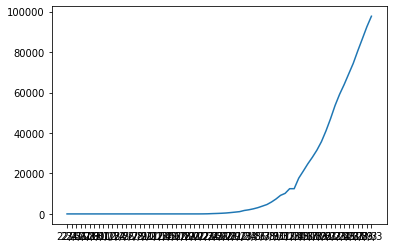

In [85]:
plt.plot(df.loc['Italy'])

In [88]:
df_delta = pd.DataFrame()
prec_col = df.columns[0]
N = 1
for col in df.columns:
    df_delta['delta ' + str(N)] = df[col] - df[prec_col]
    N = N + 1
    prec_col = col

In [89]:
df_delta

,delta 1,delta 2,delta 3,delta 4,delta 5,delta 6,delta 7,delta 8,delta 9,delta 10,...,delta 59,delta 60,delta 61,delta 62,delta 63,delta 64,delta 65,delta 66,delta 67,delta 68
Region/Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,2,0,16,0,34,10,10,16,0,10
Albania,0,0,0,0,0,0,0,0,0,0,...,6,6,13,15,19,23,28,12,11,15
Algeria,0,0,0,0,0,0,0,0,0,0,...,3,49,62,29,34,38,65,42,45,57
Andorra,0,0,0,0,0,0,0,0,0,0,...,22,13,25,20,31,24,36,43,41,26
Angola,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Burma,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8,0,2
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0


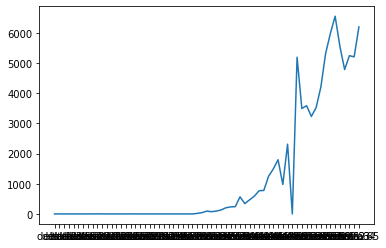

In [78]:
plt.plot(df_delta.loc['Italy'])

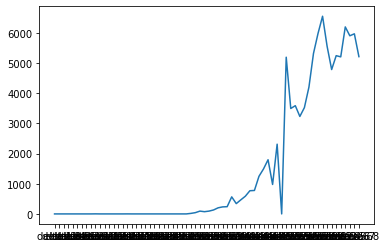

In [90]:
plt.plot(df_delta.loc['Italy'])

In [ ]:
''' Good! :D '''